In [11]:
# torch
import torch
from torch import nn

# visualization
import matplotlib.pyplot as plt
import matplotlib as mpl


# Relu Function

In [2]:
def plot(x,y,xlabel,ylabel,figsize=(4,3)):
    plt.figure(figsize=figsize)
    plt.plot(x,y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()    

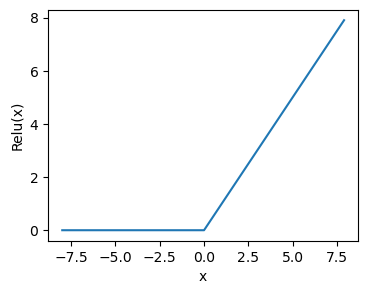

In [3]:
x = torch.arange(start=-8.,end=8.0,step=0.1,requires_grad=True)
y = torch.relu(x)
plot(x.detach(),y.detach(),"x","Relu(x)")

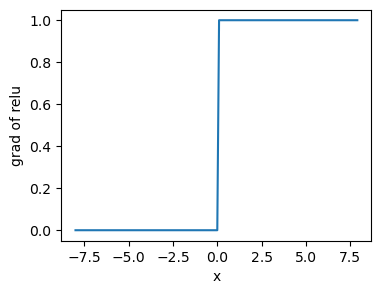

In [4]:
y.backward(torch.ones_like(x),retain_graph=True)
plot(x.detach(),x.grad,"x","grad of relu")

# Sigmoid Function

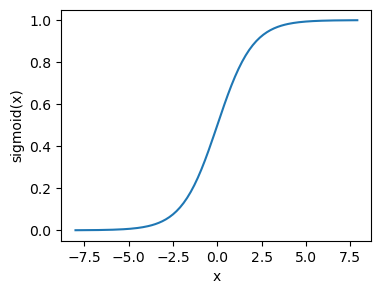

In [5]:
y = torch.sigmoid(x)
plot(x.detach(),y.detach(),"x","sigmoid(x)")

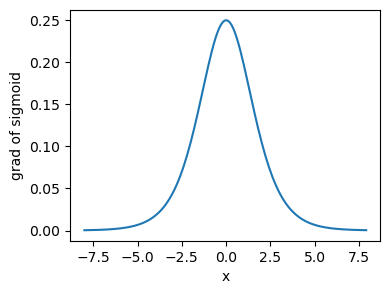

In [6]:
# clear thr grad before doing the again calculation
x.grad.data.zero_()
y.backward(torch.ones_like(x),retain_graph=True)
plot(x.detach(),x.grad,"x","grad of sigmoid")

# Tanh Function

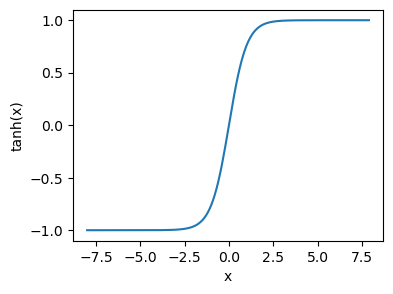

In [7]:
y = torch.tanh(x)
plot(x.detach(),y.detach(),"x","tanh(x)")

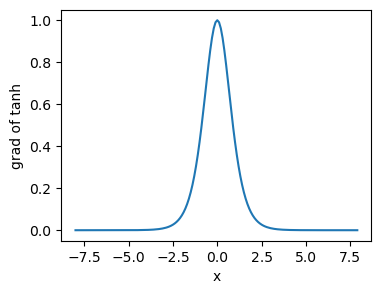

In [8]:
x.grad.data.zero_()
y.backward(torch.ones_like(x),retain_graph=True)
plot(x.detach(),x.grad,"x","grad of tanh")

# pRelu Function

PReLU(x)=max(0,x)+a∗min(0,x)


This help use to avoid the death activation of neuron, which we have problem with the relu

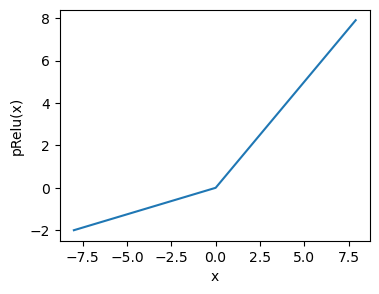

In [12]:
y = nn.PReLU()(x)
plot(x.detach(),y.detach(),"x","pRelu(x)")

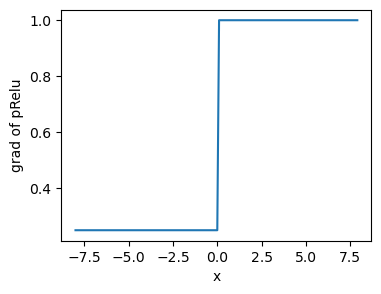

In [13]:
x.grad.data.zero_()
y.backward(torch.ones_like(x),retain_graph=True)
plot(x.detach(),x.grad,"x","grad of pRelu")

Grad is show us evident that pRelu avoid death neuron since for negative value it have some +positive value not zero as in the grad of Relu

# Swish Function or Sigmoid Linear Unit (Silu)

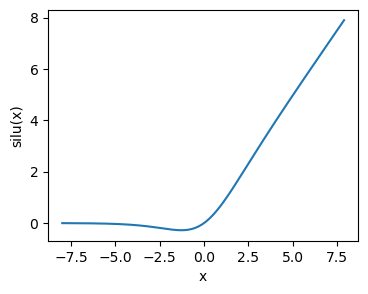

In [14]:
y = nn.SiLU()(x)
plot(x.detach(),y.detach(),"x","silu(x)")

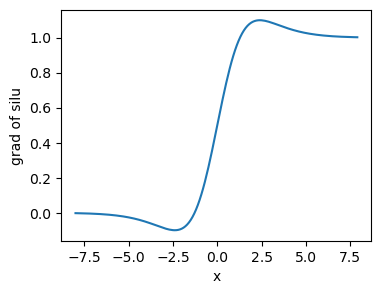

In [16]:
x.grad.data.zero_()
y.backward(torch.ones_like(x),retain_graph=True)
plot(x.detach(),x.grad,"x","grad of silu")

# Vanishing Gradient for sigmoid

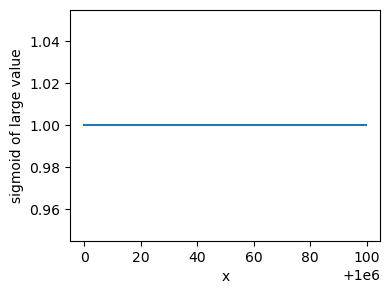

In [20]:
#! x being being very large value then gradient will we zero
x = torch.arange(1000000,1000000+100,step=0.1,requires_grad=True)
y = torch.sigmoid(x)
plot(x.detach(),y.detach(),"x","sigmoid of large value")


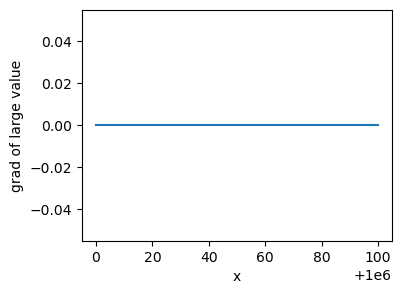

In [23]:
# it enable the highlighter
#! Now we grad of this will zero
y.backward(torch.ones_like(x),retain_graph=True)
plot(x.detach(),x.grad,"x","grad of large value")

#? this is the hugh problem having the vanishing gradient.

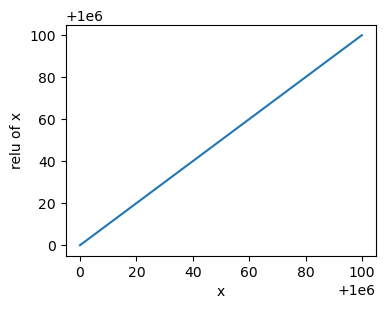

In [24]:
# sd
#? This is not case with the relu function
y = torch.relu(x)
plot(x.detach(),y.detach(),"x","relu of x")

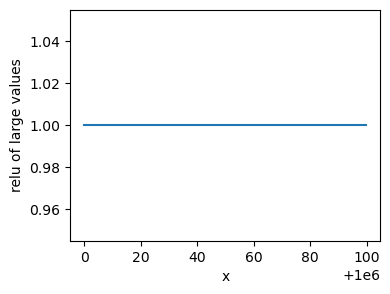

In [25]:
#d
#? grad of relu
x.grad.data.zero_()
y.backward(torch.ones_like(x),retain_graph=True)
plot(x.detach(),x.grad,"x","relu of large values")

#? Same goes for the negative value.